___
# Bosques aleatorios


Para este proyecto, exploraremos los datos disponibles públicamente de [LendingClub.com] (www.lendingclub.com). Lending Club conecta a las personas que necesitan dinero (prestatarios) con las personas que tienen dinero (inversores). Afortunadamente, como inversor, querrás invertir en personas que mostraron un perfil de tener una alta probabilidad de devolver el dinero. Intentaremos crear un modelo que ayude a predecir esto.

El club de préstamos tuvo un [año muy interesante en 2016] (https://en.wikipedia.org/wiki/Lending_Club#2016), así que revisemos algunos de sus datos y tengamos en cuenta el contexto. Estos datos son anteriores incluso a que se hicieran públicos.

Utilizaremos datos de préstamos de 2007-2010 e intentaremos clasificar y predecir si el prestatario pagó o no el préstamo en su totalidad. Puedes descargar los datos desde [aquí] (https://www.lendingclub.com/info/download-data.action) o simplemente usar el csv ya proporcionado. Se recomienda que uses el csv proporcionado, ya que se ha limpiado de los valores de NA.

Esto es lo que representan las columnas:
* credit.policy: 1 si el cliente cumple con los criterios de suscripción de crédito de LendingClub.com, y 0 en caso contrario.
* purpose: El propósito del préstamo (toma los valores "tarjeta de crédito", "consolidación de deuda", "educativo", "compra_principal", "negocio pequeño" y "todo_otro").
* int rate .: la tasa de interés del préstamo, como una proporción (una tasa del 11% se almacenaría como 0,11). A los prestatarios que LendingClub.com consideran más riesgosos se les asignan tasas de interés más altas.
* installment: las cuotas mensuales adeudadas por el prestatario si se financia el préstamo.
* log.annual.inc: el registro natural del ingreso anual autoinformado del prestatario.
* dti: la relación deuda / ingreso del prestatario (monto de la deuda dividido por el ingreso anual).
* fico: El puntaje de crédito FICO del prestatario.
* days.with.cr.line: la cantidad de días que el prestatario ha tenido una línea de crédito.
* revol.bal: saldo rotatorio del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta de crédito).
* revol.util: la tasa de utilización de la línea rotatoria del prestatario (el monto de la línea de crédito utilizada en relación con el crédito total disponible).
* inq.last.6mths: el número de consultas del prestatario por parte de los acreedores en los últimos 6 meses.
* delinq.2yrs: El número de veces que el prestatario ha estado atrasado más de 30 días en un pago en los últimos 2 años.
* pub.rec: el número de registros públicos despectivos del prestatario (declaraciones de quiebra, gravámenes fiscales o sentencias).

## Importar librerías

## Cargar los datos

**Usa pandas para leer el archivo "loan_data.csv" y carga la información en un dataframe llamado loans.**

In [2]:
loans = pd.read_csv('loan_data.csv')

**Usa los métodos info (), head () y describe () en loans.**

In [ ]:
#Escribe tu código aqui


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#Escribe tu código aqui


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
#Escribe tu código aqui


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

¡Hagamos un poco de visualización de datos! Utilizaremos capacidades de trazado incorporadas de seaborn y pandas, pero siéntete libre de usar la biblioteca que desees. No te preocupes por la coincidencia de colores de las gráficas, solo preocúpate por tener la idea principal de lo que se busca con la visualización.  

**Crea un histograma de dos distribuciones de la columna FICO, una para cada crédito (credit.policy). Las distribuciones deberán estar una encima de la otra**  

* Nota: Esto es bastante complicado, no dudes en consultar las soluciones. Probablemente necesitarás una línea de código para cada histograma *

In [ ]:
#Escribe tu código aqui


Text(0.5, 0, 'FICO')

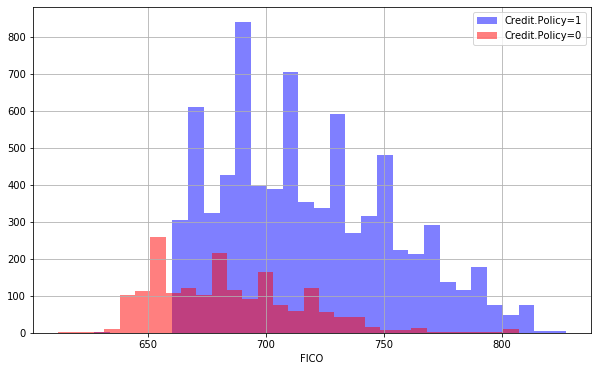

**Crea una figura similar, excepto que esta vez selecciona la columna not.fully.paid.**

In [ ]:
#Escribe tu código aqui


Text(0.5, 0, 'FICO')

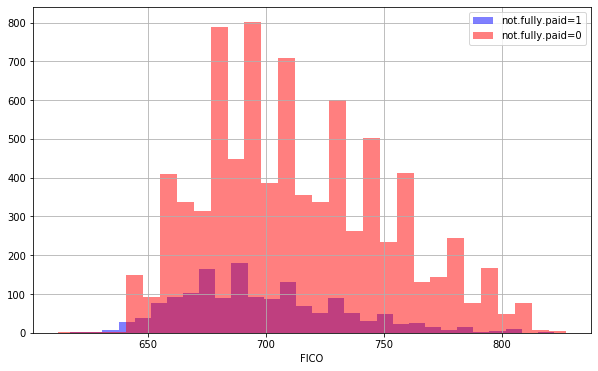

**Crea un diagrama utilizando seaborn que muestre el número de préstamos por propósito (purpose), con el tono de color definido por not.fully.paid.**

In [ ]:
#Escribe tu código aqui


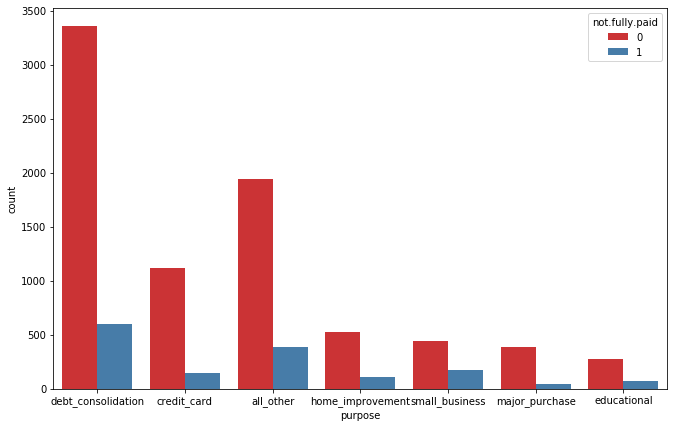

**Veamos la tendencia entre el puntaje FICO y la tasa de interés. Recree la siguiente gráfica.**

In [ ]:
#Escribe tu código aqui


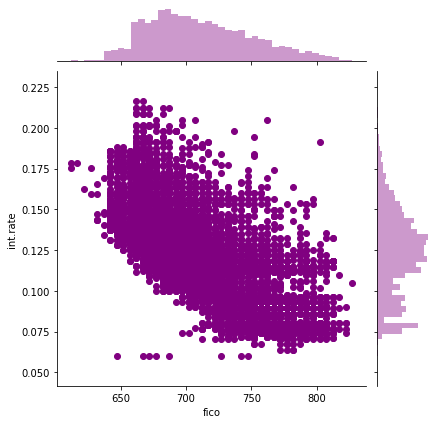

**Crea los siguientes lmplots, para ver si la tendencia difiere entre not.fully.paid y credit.policy. Consulta la documentación de lmplot () si no puedes encontrar la manera de separarlo en columnas.**

In [ ]:
#Escribe tu cpodigo aqui


<Figure size 792x504 with 0 Axes>

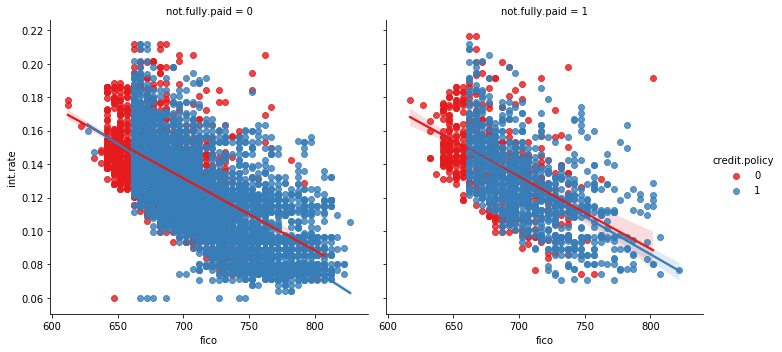

# Configurando los datos

¡Preparémonos para configurar nuestros datos para nuestro modelo de clasificación de bosque aleatorio!

**Verifiquemos los datos nuevamente, con la función info()**

In [ ]:
#Escribe tu código aqui


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Características Categóricas

Como podemos observar, **purpose** es categórica.  

Esto significa que necesitamos transformarla, usando variables dummy, para que sklearn sea capaz de entenderla. Hagamos esto en un paso, usando 'pd.get_dummies'.  

Veamos una manera de manejar estas columnas, que puede extenderse a varias categorías categóricas, en caso de ser necesario.  

**Crea una lista de 1 elemento, que contenga la cadena 'purpose'. Llama esta lista con el nombre 'cat_feats'.**

In [12]:
cat_feats = ['purpose']

**Usa pd.get_dummies(loans,columns=cat_feats,drop_first=True) para crear un dataframe fijo mayor, que contenga las nuevas columnas de las características con la variable dummy. Llama a este dataframe con el nombre 'final_data?.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Dividir los datos

¡Ahora es el momento de dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba!

**Usa sklearn para dividir los datos en un conjunto de entrenamiento y un conjunto de pruebas, como lo hemos hecho en el pasado.**

## Entrenemos el modelo


¡Comencemos entrenando primero un árbol de decisión único!

**Importar DecisionTreeClassifier**

**Crea una instancia de DecisionTreeClassifier () llamada dtree y entrénala con los datos de entrenamiento.**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicción y evaluación

**Crea predicciones a partir del conjunto de pruebas y crea un informe de clasificación y una matriz de confusión**

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.17      0.21      0.19       443

    accuracy                           0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.75      0.73      0.74      2874



[[1994  437]
 [ 351   92]]


## Entrenar el modelo de bosques aleatorios


¡Ahora es el momento de entrenar a nuestro modelo!

**Crea una instancia de la clase RandomForestClassifier y entrénala con los datos de entrenamiento del paso anterior.**

In [25]:
rfc = RandomForestClassifier(n_estimators=600)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicción y evaluación

Vamos a predecir los valores de y_test y evaluar nuestro modelo.

**Realiza una predicción para los datos de X_test.**

**Ahora crea un informe de clasificación a partir de los resultados. ¿Hay algo extraño o algún tipo de advertencia?**

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.43      0.01      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874



**Muestra la matriz de confusión para las predicciones.**

[[2423    8]
 [ 437    6]]


**¿Qué funcionó mejor, el bosque aleatorio o el árbol de decisión?**

# ¡Buen trabajo!